In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
import seaborn as sns
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.utils import resample

from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [13]:
airQ_data = pd.read_csv('../Datasets/AirQuality/AirQualityData_3/airquality-1998_2017.csv', low_memory =False)
len(airQ_data)
airQ_data.tail()

,id,city_name,state_name,Week,Year,avg_aqi
61771,61382,Long Beach,California,53,2017,127.333333
61772,61454,Anaheim,California,53,2017,116.000000
61773,61540,El Cajon,California,53,2017,92.000000
61774,61596,Chico,California,53,2017,95.000000
61775,61764,Yuba City,California,53,2017,82.000000


In [14]:
len(airQ_data)

61776

In [15]:
#Removing city and taking avg
airQ_data_mean = airQ_data.groupby(['state_name','Week','Year'])['avg_aqi'].mean().reset_index()
airQ_data_mean.head()

,state_name,Week,Year,avg_aqi
0,California,0,1999,92.500000
1,California,0,2000,75.437500
2,California,0,2001,87.254457
3,California,0,2002,61.261568
4,California,0,2003,55.143505


In [16]:
len(airQ_data_mean)

1011

In [17]:
#dropping 0 values
indexNames = airQ_data_mean[ (airQ_data_mean['avg_aqi'] == 0.000000)].index
airQ_data_mean.drop(indexNames , inplace=True)
airQ_data_mean.head()


,state_name,Week,Year,avg_aqi
0,California,0,1999,92.500000
1,California,0,2000,75.437500
2,California,0,2001,87.254457
3,California,0,2002,61.261568
4,California,0,2003,55.143505


In [18]:
len(airQ_data_mean)

1011

In [19]:
airQ_data_mean['Week'].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53])

In [20]:
#increasing week number by 1 to match influenza data
airQ_data_mean['Week'] = airQ_data_mean['Week']+1
airQ_data_mean['Week'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54])

In [21]:
airQ_data_mean['Year'].unique()

array([1999, 2000, 2001, 2002, 2003, 2004, 2005, 2007, 2008, 2009, 2010,
       2011, 2013, 2014, 2015, 2016, 2006, 2012, 2017, 1998])

In [22]:
airQ_data_mean

,state_name,Week,Year,avg_aqi
0,California,1,1999,92.500000
1,California,1,2000,75.437500
2,California,1,2001,87.254457
3,California,1,2002,61.261568
4,California,1,2003,55.143505
...,...,...,...,...
1006,California,53,2017,78.873386
1007,California,54,2000,130.863636
1008,California,54,2006,83.514493
1009,California,54,2012,63.000000


In [38]:
#we will use this influenza data
flu_data = pd.read_csv('../Datasets/Disease cases/Flu/Flu_California_Data.csv', low_memory=False)
flu_data.head()

,CATCHMENT,NETWORK,SEASON,MMWR-YEAR,MMWR-WEEK,AGE CATEGORY,CUMULATIVE RATE,WEEKLY RATE
0,California,EIP,2005-06,2005,40,0-4 yr,0.9,0.9
1,California,EIP,2005-06,2005,41,0-4 yr,2.6,1.7
2,California,EIP,2005-06,2005,42,0-4 yr,2.6,0.0
3,California,EIP,2005-06,2005,43,0-4 yr,2.6,0.0
4,California,EIP,2005-06,2005,44,0-4 yr,2.6,0.0


In [40]:
flu_data['AGE CATEGORY'].unique()

array(['0-4 yr', '5-17 yr', '18-49 yr', '50-64 yr', '65+ yr', 'Overall',
       '65-74 yr', '75-84 yr', '85+'], dtype=object)

In [42]:
flu_data['MMWR-YEAR'].unique()

array([2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015,
       2016, 2017, 2018, 2019])

In [44]:
#merging AQ data && influenza data

merged = pd.merge(airQ_data_mean,flu_data,how='inner', left_on=['Year', 'Week'], right_on=['MMWR-YEAR','MMWR-WEEK'])

In [45]:
len(merged)

3393

In [46]:
merged

,state_name,Week,Year,avg_aqi,CATCHMENT,NETWORK,SEASON,MMWR-YEAR,MMWR-WEEK,AGE CATEGORY,CUMULATIVE RATE,WEEKLY RATE
0,California,1,2007,48.906338,California,EIP,2006-07,2007,1,0-4 yr,3.0,0.5
1,California,1,2007,48.906338,California,EIP,2006-07,2007,1,5-17 yr,0.2,0.0
2,California,1,2007,48.906338,California,EIP,2006-07,2007,1,18-49 yr,0.1,0.1
3,California,1,2007,48.906338,California,EIP,2006-07,2007,1,50-64 yr,0.5,0.5
4,California,1,2007,48.906338,California,EIP,2006-07,2007,1,65+ yr,0.5,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
3388,California,53,2014,53.122396,California,EIP,2014-15,2014,53,65+ yr,18.3,8.5
3389,California,53,2014,53.122396,California,EIP,2014-15,2014,53,Overall,4.3,1.9
3390,California,53,2014,53.122396,California,EIP,2014-15,2014,53,65-74 yr,8.1,4.4
3391,California,53,2014,53.122396,California,EIP,2014-15,2014,53,75-84 yr,21.6,12.2


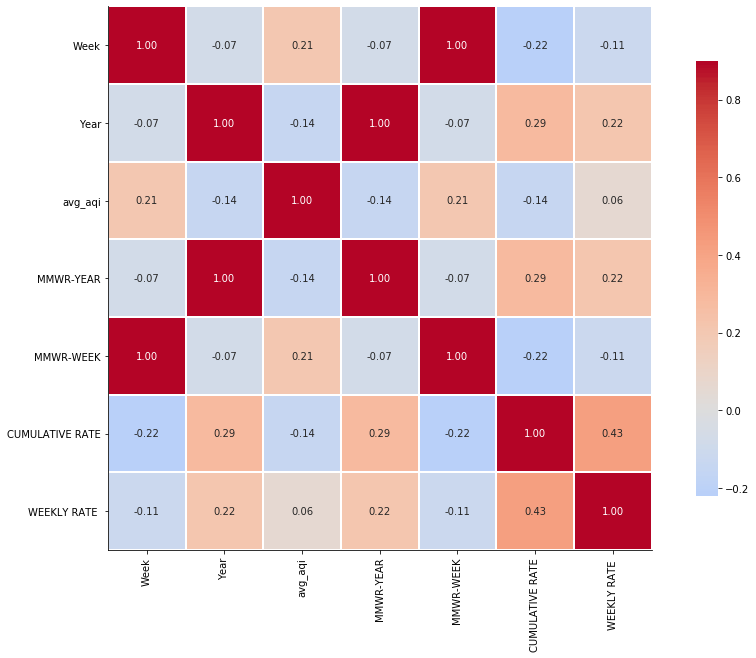

In [47]:
corr = merged.corr()
g = sns.heatmap(corr, vmax=.9, center=0,
               square=True, linewidths=.9, cbar_kws={"shrink": .8}, annot=True, fmt='.2f', cmap='coolwarm')
bottom, top = g.get_ylim()
g.set_ylim(bottom + 0.5, top - 0.5)
sns.despine()
g.figure.set_size_inches(16, 10)

In [51]:
merged_filtered = merged[merged['AGE CATEGORY'] == '18-49 yr']
flu_data['AGE CATEGORY'].unique()

array(['0-4 yr', '5-17 yr', '18-49 yr', '50-64 yr', '65+ yr', 'Overall',
       '65-74 yr', '75-84 yr', '85+'], dtype=object)

In [52]:
merged_filtered.head()

,state_name,Week,Year,avg_aqi,CATCHMENT,NETWORK,SEASON,MMWR-YEAR,MMWR-WEEK,AGE CATEGORY,CUMULATIVE RATE,WEEKLY RATE
2,California,1,2007,48.906338,California,EIP,2006-07,2007,1,18-49 yr,0.1,0.1
11,California,1,2008,42.092245,California,EIP,2007-08,2008,1,18-49 yr,0.3,0.2
20,California,1,2009,78.039744,California,EIP,2008-09,2009,1,18-49 yr,0.1,0.0
29,California,1,2010,45.354839,California,EIP,2009-10,2010,1,18-49 yr,13.8,0.3
38,California,1,2011,48.000000,California,EIP,2010-11,2011,1,18-49 yr,0.4,0.1


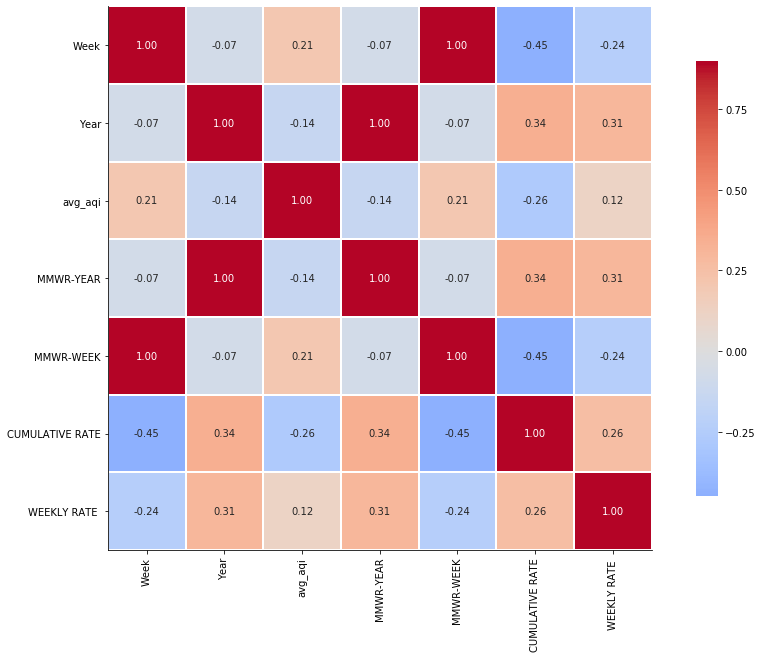

In [53]:
corr = merged_filtered.corr()
g = sns.heatmap(corr, vmax=.9, center=0,
               square=True, linewidths=.9, cbar_kws={"shrink": .8}, annot=True, fmt='.2f', cmap='coolwarm')
bottom, top = g.get_ylim()
g.set_ylim(bottom + 0.5, top - 0.5)
sns.despine()
g.figure.set_size_inches(16, 10)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 <a list of 13 Text xticklabel objects>)

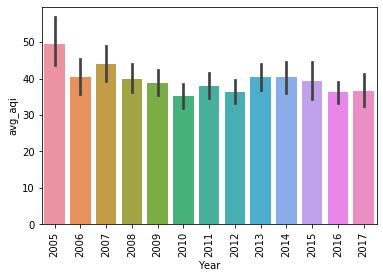

In [54]:
sns.barplot(x='Year', y='avg_aqi', data=merged_filtered, saturation=0.8)
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 <a list of 13 Text xticklabel objects>)

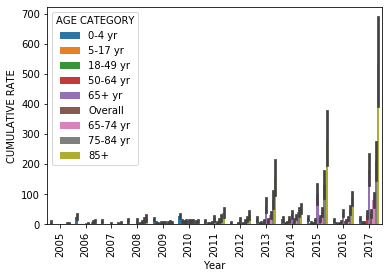

In [57]:
sns.barplot(x='Year', y='CUMULATIVE RATE', hue='AGE CATEGORY', data=merged, saturation=0.8)
plt.xticks(rotation=90)

In [58]:
merged

,state_name,Week,Year,avg_aqi,CATCHMENT,NETWORK,SEASON,MMWR-YEAR,MMWR-WEEK,AGE CATEGORY,CUMULATIVE RATE,WEEKLY RATE
0,California,1,2007,48.906338,California,EIP,2006-07,2007,1,0-4 yr,3.0,0.5
1,California,1,2007,48.906338,California,EIP,2006-07,2007,1,5-17 yr,0.2,0.0
2,California,1,2007,48.906338,California,EIP,2006-07,2007,1,18-49 yr,0.1,0.1
3,California,1,2007,48.906338,California,EIP,2006-07,2007,1,50-64 yr,0.5,0.5
4,California,1,2007,48.906338,California,EIP,2006-07,2007,1,65+ yr,0.5,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
3388,California,53,2014,53.122396,California,EIP,2014-15,2014,53,65+ yr,18.3,8.5
3389,California,53,2014,53.122396,California,EIP,2014-15,2014,53,Overall,4.3,1.9
3390,California,53,2014,53.122396,California,EIP,2014-15,2014,53,65-74 yr,8.1,4.4
3391,California,53,2014,53.122396,California,EIP,2014-15,2014,53,75-84 yr,21.6,12.2


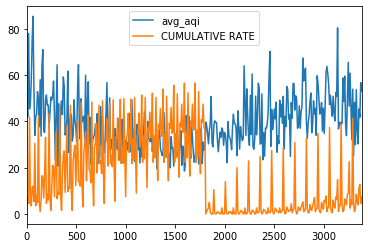

In [59]:
#plotting AQ index value vs. Virus
merged_filtered=merged[merged['AGE CATEGORY'] == '0-4 yr']
merged_filtered[['avg_aqi','CUMULATIVE RATE']].plot()

(array([2004., 2006., 2008., 2010., 2012., 2014., 2016., 2018.]),
 <a list of 8 Text xticklabel objects>)

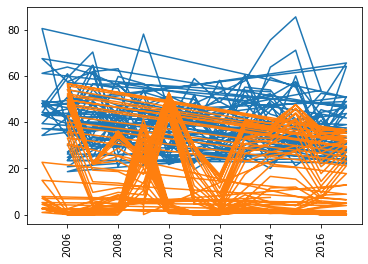

In [61]:
plt.figure()

merged_filtered=merged[merged['AGE CATEGORY'] == '0-4 yr']


x = merged_filtered['Year']
y1 = merged_filtered['avg_aqi'] 
y2 = merged_filtered['CUMULATIVE RATE']


plt.plot(x,y1)
plt.plot(x,y2)
plt.xticks(rotation=90)

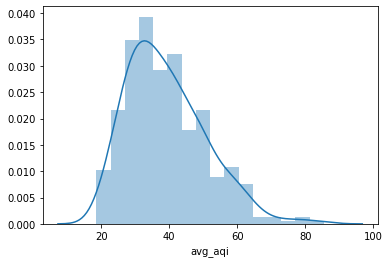

In [62]:
sns.distplot(merged_filtered['avg_aqi'])
plt.show()

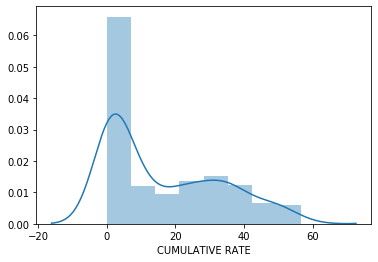

In [63]:
sns.distplot(merged_filtered['CUMULATIVE RATE'])
plt.show()

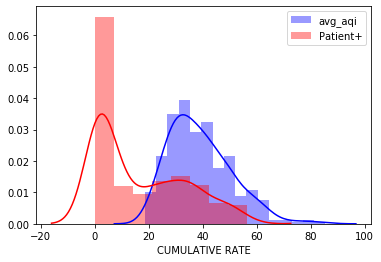

In [64]:
# Method 1: on the same Axis
sns.distplot( (merged_filtered["avg_aqi"]) , color="blue", label="avg_aqi")
sns.distplot( merged_filtered["CUMULATIVE RATE"] , color="red", label="Patient+")
plt.legend()
 
plt.show()


In [65]:
merged.head()

,state_name,Week,Year,avg_aqi,CATCHMENT,NETWORK,SEASON,MMWR-YEAR,MMWR-WEEK,AGE CATEGORY,CUMULATIVE RATE,WEEKLY RATE
0,California,1,2007,48.906338,California,EIP,2006-07,2007,1,0-4 yr,3.0,0.5
1,California,1,2007,48.906338,California,EIP,2006-07,2007,1,5-17 yr,0.2,0.0
2,California,1,2007,48.906338,California,EIP,2006-07,2007,1,18-49 yr,0.1,0.1
3,California,1,2007,48.906338,California,EIP,2006-07,2007,1,50-64 yr,0.5,0.5
4,California,1,2007,48.906338,California,EIP,2006-07,2007,1,65+ yr,0.5,0.0


In [86]:
# Prep Training and Test data -from combined age group
trainData, testData = train_test_split(merged, train_size=0.7, random_state=100)

In [69]:
merged.columns

Index(['state_name', 'Week', 'Year', 'avg_aqi', 'CATCHMENT', 'NETWORK',
       'SEASON', 'MMWR-YEAR', 'MMWR-WEEK', 'AGE CATEGORY', 'CUMULATIVE RATE',
       'WEEKLY RATE '],
      dtype='object')

In [82]:
merged['AGE CATEGORY CODE'] = merged['AGE CATEGORY'].astype('category').cat.codes

In [83]:
merged.dtypes

state_name            object
Week                   int64
Year                   int64
avg_aqi              float64
CATCHMENT             object
NETWORK               object
SEASON                object
MMWR-YEAR              int64
MMWR-WEEK              int64
AGE CATEGORY          object
CUMULATIVE RATE      float64
WEEKLY RATE          float64
AGE CATEGORY CODE       int8
dtype: object

In [87]:
#X and Y(target) for linear regression
Y_trainData = trainData[['CUMULATIVE RATE']]
X_trainData= trainData.drop(['state_name','CUMULATIVE RATE','CATCHMENT','NETWORK','WEEKLY RATE ','SEASON','AGE CATEGORY'], axis =1 )
X_trainData.head()

#test data
Y_testData = testData[['CUMULATIVE RATE']]
X_testData= testData.drop(['state_name','CUMULATIVE RATE','CATCHMENT','NETWORK','WEEKLY RATE ','SEASON','AGE CATEGORY'], axis =1 )


In [88]:
X_trainData.head()

,Week,Year,avg_aqi,MMWR-YEAR,MMWR-WEEK,AGE CATEGORY CODE
2100,42,2006,39.273309,2006,42,3
1775,17,2014,21.690497,2014,17,1
2172,42,2014,33.953684,2014,42,3
2351,44,2008,54.500021,2008,44,1
503,5,2016,37.438897,2016,5,7


In [89]:
# Creating linear regression model.
lr_model = LinearRegression()
lr_model.fit(X_trainData,Y_trainData)

# print the R-squared value for the model
print('Training score%: ',lr_model.score(X_trainData, Y_trainData) *100, '%')
print('Test score: ',lr_model.score(X_testData,Y_testData)*100, '%')

y_pred = lr_model.predict(X_testData)
mse = mean_squared_error(Y_testData, y_pred)
rmse = math.sqrt(mse)

print('RMSE: {}'.format(rmse))

# Get the slope and intercept of the line best fit.
print(lr_model.intercept_)
print(lr_model.coef_)

Training score%:  15.127866164659665 %
Test score:  17.006590757180618 %
RMSE: 63.506734653291915
[-13029.21109737]
[[ 7.52114934e+13  3.75984144e+10 -4.78773568e-01 -3.75984144e+10
  -7.52114934e+13  6.73816327e+00]]


In [90]:
#for individual age group 
merged_filtered=merged[merged['AGE CATEGORY'] == '18-49 yr']
# Prep Training and Test data -from combined age group
trainData, testData = train_test_split(merged_filtered, train_size=0.7, random_state=100)

In [92]:
trainData.head()

,state_name,Week,Year,avg_aqi,CATCHMENT,NETWORK,SEASON,MMWR-YEAR,MMWR-WEEK,AGE CATEGORY,CUMULATIVE RATE,WEEKLY RATE,AGE CATEGORY CODE
1568,California,15,2015,21.035916,California,EIP,2014-15,2015,15,18-49 yr,9.5,0.0,1
317,California,4,2008,20.648614,California,EIP,2007-08,2008,4,18-49 yr,0.8,0.3,1
1325,California,13,2012,26.046515,California,EIP,2011-12,2012,13,18-49 yr,4.0,0.6,1
353,California,4,2012,48.860765,California,EIP,2011-12,2012,4,18-49 yr,0.5,0.1,1
2621,California,46,2012,37.755362,California,EIP,2012-13,2012,46,18-49 yr,0.0,0.0,1


In [93]:
#X and Y(target) for linear regression-individual age group 
Y_trainData = trainData[['CUMULATIVE RATE']]
X_trainData= trainData.drop(['state_name','CUMULATIVE RATE','CATCHMENT','NETWORK','WEEKLY RATE ','SEASON','AGE CATEGORY'], axis =1 )
X_trainData.head()

#test data
Y_testData = testData[['CUMULATIVE RATE']]
X_testData= testData.drop(['state_name','CUMULATIVE RATE','CATCHMENT','NETWORK','WEEKLY RATE ','SEASON','AGE CATEGORY'], axis =1 )



In [94]:
# Creating linear regression model--individual age group
lr_model = LinearRegression()
lr_model.fit(X_trainData,Y_trainData)

# print the R-squared value for the model
print('Training score%: ',lr_model.score(X_trainData, Y_trainData) *100, '%')
print('Test score: ',lr_model.score(X_testData,Y_testData)*100, '%')

y_pred = lr_model.predict(X_testData)
mse = mean_squared_error(Y_testData, y_pred)
rmse = math.sqrt(mse)
print('RMSE: {}'.format(rmse))

# Get the slope and intercept of the line best fit.
print('intercept:',lr_model.intercept_)
print('coef', lr_model.coef_)

Training score%:  29.829450104636045 %
Test score:  33.264923709879454 %
RMSE: 3.879770575506874
intercept: [-899.45953891]
coef [[-0.05141575  0.22551207 -0.02793659  0.22551207 -0.05141575  0.        ]]


In [95]:
#creating polynomial features--individual age group 

steps = [
    ('scalar', StandardScaler()),
    ('poly', PolynomialFeatures(degree=2)),
    ('model', LinearRegression())
]

pipeline = Pipeline(steps)
pipeline.fit(X_trainData, Y_trainData)

print('Training score%: ',pipeline.score(X_trainData, Y_trainData) *100, '%')
print('Test score: ',pipeline.score(X_testData, Y_testData)*100, '%')
# Testing score has decreased due to overfitting

Training score%:  43.56201850233967 %
Test score:  51.21531701982677 %


In [96]:
#l2 Regularization or Ridge Regression-alpha value =50-individual age group 

steps = [
    ('scalar', StandardScaler()),
    ('poly', PolynomialFeatures(degree=2)),
    ('model', Ridge(alpha=50, fit_intercept=True))
]

ridge_pipe = Pipeline(steps)
ridge_pipe.fit(X_trainData, Y_trainData)


print('Training score%: ',ridge_pipe.score(X_trainData, Y_trainData) *100, '%')
print('Test score: ',ridge_pipe.score(X_testData, Y_testData)*100, '%')

mse = mean_squared_error(Y_testData, y_pred)
rmse = math.sqrt(mse)

print('RMSE: {}'.format(rmse))

Training score%:  43.246937184919254 %
Test score:  50.626658123080325 %
RMSE: 3.879770575506874


In [97]:
# l1 Regularization or Lasso Regression-individual age group 

steps = [
    ('scalar', StandardScaler()),
    ('poly', PolynomialFeatures(degree=2)),
    ('model', Lasso(alpha=0.3, fit_intercept=True))
]

lasso_pipe = Pipeline(steps)
lasso_pipe.fit(X_trainData, Y_trainData)


print('Training score%: ',lasso_pipe.score(X_trainData, Y_trainData) *100, '%')
print('Test score: ',lasso_pipe.score(X_testData, Y_testData)*100, '%')

mse = mean_squared_error(Y_testData, y_pred)
rmse = math.sqrt(mse)

print('RMSE: {}'.format(rmse))

Training score%:  40.74038095189682 %
Test score:  43.99520217436009 %
RMSE: 3.879770575506874


# Random Forest

In [103]:
Y_trainData.head()

,CUMULATIVE RATE
2100,0.0
1775,13.8
2172,0.3
2351,0.0
503,57.3


In [104]:

y_train1 = np.asarray(Y_trainData.values, dtype="int")
y_test1 = np.asarray(Y_testData.values, dtype="int")

In [108]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_trainData,y_train1)

y_pred=clf.predict(X_testData)

/Users/jeyasri/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


In [109]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test1,y_pred)*100

38.80157170923379

# Running for new field 

In [114]:
trainData.columns

Index(['state_name', 'Week', 'Year', 'avg_aqi', 'CATCHMENT', 'NETWORK',
       'SEASON', 'MMWR-YEAR', 'MMWR-WEEK', 'AGE CATEGORY', 'CUMULATIVE RATE',
       'WEEKLY RATE ', 'AGE CATEGORY CODE'],
      dtype='object')

In [115]:
#X and Y(target) for linear regression-individual age group 
Y_trainData = trainData[['WEEKLY RATE ']]
X_trainData= trainData.drop(['state_name','CUMULATIVE RATE','CATCHMENT','NETWORK','WEEKLY RATE ','SEASON','AGE CATEGORY'], axis =1 )
X_trainData.head()

#test data
Y_testData = testData[['WEEKLY RATE ']]
X_testData= testData.drop(['state_name','CUMULATIVE RATE','CATCHMENT','NETWORK','WEEKLY RATE ','SEASON','AGE CATEGORY'], axis =1 )




In [116]:
# Creating linear regression model--individual age group
lr_model = LinearRegression()
lr_model.fit(X_trainData,Y_trainData)

# print the R-squared value for the model
print('Training score%: ',lr_model.score(X_trainData, Y_trainData) *100, '%')
print('Test score: ',lr_model.score(X_testData,Y_testData)*100, '%')

y_pred = lr_model.predict(X_testData)
mse = mean_squared_error(Y_testData, y_pred)
rmse = math.sqrt(mse)
print('RMSE: {}'.format(rmse))

# Get the slope and intercept of the line best fit.
print('intercept:',lr_model.intercept_)
print('coef', lr_model.coef_)

Training score%:  8.528995657677708 %
Test score:  11.27768236838602 %
RMSE: 5.75228258429566
intercept: [-1159.88612105]
coef [[ 4.03617643e+12  2.01769473e+09  8.55225693e-02 -2.01769473e+09
  -4.03617643e+12  5.07177713e-01]]


In [117]:
#creating polynomial features--individual age group 

steps = [
    ('scalar', StandardScaler()),
    ('poly', PolynomialFeatures(degree=2)),
    ('model', LinearRegression())
]

pipeline = Pipeline(steps)
pipeline.fit(X_trainData, Y_trainData)

print('Training score%: ',pipeline.score(X_trainData, Y_trainData) *100, '%')
print('Test score: ',pipeline.score(X_testData, Y_testData)*100, '%')
# Testing score has decreased due to overfitting

Training score%:  16.678883932704213 %
Test score:  17.77421567482198 %


In [118]:
#l2 Regularization or Ridge Regression-alpha value =50-individual age group 

steps = [
    ('scalar', StandardScaler()),
    ('poly', PolynomialFeatures(degree=2)),
    ('model', Ridge(alpha=50, fit_intercept=True))
]

ridge_pipe = Pipeline(steps)
ridge_pipe.fit(X_trainData, Y_trainData)


print('Training score%: ',ridge_pipe.score(X_trainData, Y_trainData) *100, '%')
print('Test score: ',ridge_pipe.score(X_testData, Y_testData)*100, '%')

mse = mean_squared_error(Y_testData, y_pred)
rmse = math.sqrt(mse)

print('RMSE: {}'.format(rmse))

Training score%:  16.677100940439193 %
Test score:  18.23073053056553 %
RMSE: 5.75228258429566


In [119]:
# l1 Regularization or Lasso Regression-individual age group 

steps = [
    ('scalar', StandardScaler()),
    ('poly', PolynomialFeatures(degree=2)),
    ('model', Lasso(alpha=0.3, fit_intercept=True))
]

lasso_pipe = Pipeline(steps)
lasso_pipe.fit(X_trainData, Y_trainData)


print('Training score%: ',lasso_pipe.score(X_trainData, Y_trainData) *100, '%')
print('Test score: ',lasso_pipe.score(X_testData, Y_testData)*100, '%')

mse = mean_squared_error(Y_testData, y_pred)
rmse = math.sqrt(mse)

print('RMSE: {}'.format(rmse))

Training score%:  14.850091274421484 %
Test score:  18.652959936388424 %
RMSE: 5.75228258429566


## Random Forest

In [125]:

y_train1 = np.asarray(Y_trainData.values, dtype="int")
y_test1 = np.asarray(Y_testData.values, dtype="int")

In [126]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_trainData,y_train1)

y_pred=clf.predict(X_testData)

/Users/jeyasri/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


In [127]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test1,y_pred)*100

66.60117878192534

## Below code is reference from 

https://github.com/kidaufo/StatisticalModeling/blob/master/GLM.ipynb
https://towardsdatascience.com/generalized-linear-models-9cbf848bb8ab

In [100]:
# Poisson regression code

import statsmodels.api as sm
np.random.seed(5)
n_sample = 100
a = 0.6
b = -0.4

x = uniform(1, 5, size=n_sample)
mu = np.exp(a * x + b)
y = poisson(mu)

exog, endog = sm.add_constant(x), y

# Poisson regression
mod = sm.GLM(endog, exog, family=sm.families.Poisson(link=sm.families.links.log()))
res = mod.fit()
display(res.summary())

y_pred = res.predict(exog)

idx = x.argsort()
x_ord, y_pred_ord = x[idx], y_pred[idx]
plt.plot(x_ord, y_pred_ord, color='m')
plt.scatter(x, y,  s=20, alpha=0.8)
plt.xlabel("X")
plt.ylabel("Y")

NameError: name 'uniform' is not defined

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                  100
Model:                            GLM   Df Residuals:                       98
Model Family:                Gaussian   Df Model:                            1
Link Function:                    log   Scale:                          6.1765
Method:                          IRLS   Log-Likelihood:                -231.93
Date:                Fri, 22 Nov 2019   Deviance:                       605.30
Time:                        08:25:54   Pearson chi2:                     605.
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.2369      0.224     -1.059      0.290      -0.675       0.202
x1             0.5541      0.052     10.583      0.000       0.451       0.657
==============================================================================
"""

Text(0, 0.5, 'Y')

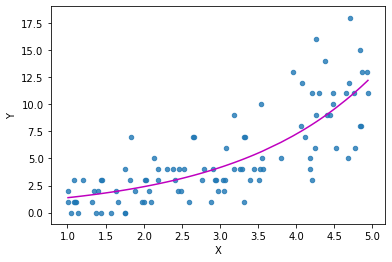

In [140]:
# Normal distribution + log link function
from numpy.random import uniform, normal, poisson, binomial


np.random.seed(5)
n_sample = 100
a = 0.6
b = -0.4

x = uniform(1, 5, size=n_sample)
mu = np.exp(a * x + b)
y = poisson(mu)
exog, endog = sm.add_constant(x), y


mod = sm.GLM(endog, exog, family=sm.families.Gaussian(sm.families.links.log()))
res = mod.fit()
display(res.summary())

y_pred = res.predict(exog)

idx = x.argsort()
x_ord, y_pred_ord = x[idx], y_pred[idx]

plt.plot(x_ord, y_pred_ord, color='m')
plt.scatter(x, y,  s=20, alpha=0.8)
plt.xlabel("X")
plt.ylabel("Y")

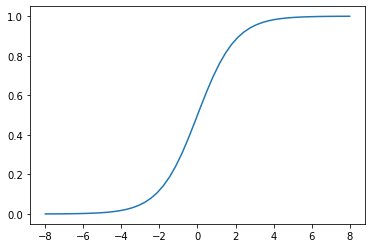

In [129]:
def logistic(x):
    return 1 / (1 + np.exp(-x))


xx = np.linspace(-8, 8)
plt.plot(xx, logistic(xx))

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                  100
Model:                            GLM   Df Residuals:                       98
Model Family:                Binomial   Df Model:                            1
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -31.508
Date:                Fri, 22 Nov 2019   Deviance:                       63.016
Time:                        08:19:27   Pearson chi2:                     109.
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -7.0444      1.385     -5.087      0.000      -9.758      -4.330
x1             2.4211      0.465      5.207      0.000       1.510       3.332
==============================================================================
"""

Text(0, 0.5, 'Y')

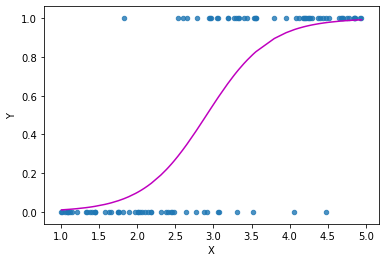

In [133]:
#logistic regression


np.random.seed(5)
n_sample = 100
a = 3.0
b = -9.0

x = uniform(1, 5, size=n_sample)
x = np.sort(x)

q = logistic(a * x + b)
y = binomial(n=1, p=q)

exog, endog = sm.add_constant(X_train), y_train

# Logistic regression
mod = sm.GLM(endog, exog, family=sm.families.Binomial(link=sm.families.links.logit()))
res = mod.fit()
display(res.summary())

y_pred = res.predict(exog)

idx = x.argsort()
x_ord, y_pred_ord = x[idx], y_pred[idx]
plt.plot(x_ord, y_pred_ord, color='m')
plt.scatter(x, y,  s=20, alpha=0.8)
plt.xlabel("X")
plt.ylabel("Y")
# plt.savefig('logistic_regression.png')

In [134]:
np.random.seed(5)
n_sample = 100
a = 0.6
b = -0.4
sd = 0.8

x = uniform(1, 5, size=n_sample)
mu = np.exp(a * x + b)
y = normal(mu, sd)

Text(0, 0.5, 'Y')

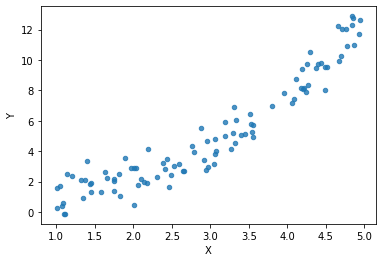

In [135]:
plt.scatter(x, y,  s=20, alpha=0.8)
plt.xlabel("X")
plt.ylabel("Y")
# plt.savefig('custom_GLM_data.png')

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                  100
Model:                            GLM   Df Residuals:                       98
Model Family:                Gaussian   Df Model:                            1
Link Function:                    log   Scale:                         0.69261
Method:                          IRLS   Log-Likelihood:                -122.53
Date:                Fri, 22 Nov 2019   Deviance:                       67.876
Time:                        08:20:36   Pearson chi2:                     67.9
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.3115      0.075     -4.130      0.000      -0.459      -0.164
x1             0.5789      0.018     32.984      0.000       0.545       0.613
==============================================================================
"""

Text(0, 0.5, 'Y')

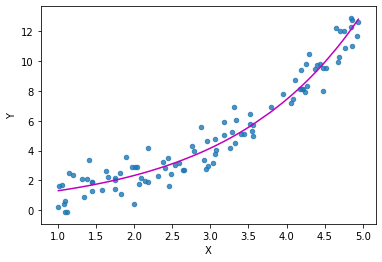

In [136]:
exog = sm.add_constant(x)
endog = y

# Normal distribution + log link function
mod = sm.GLM(endog, exog, family=sm.families.Gaussian(sm.families.links.log()))
res = mod.fit()
display(res.summary())

y_pred = res.predict(exog)

idx = x.argsort()
x_ord, y_pred_ord = x[idx], y_pred[idx]

plt.plot(x_ord, y_pred_ord, color='m')
plt.scatter(x, y,  s=20, alpha=0.8)
plt.xlabel("X")
plt.ylabel("Y")